In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, roc_auc_score

In [2]:
df=pd.read_csv('./data/preprocessed_Bank_Customer_Churn_Prediction.csv')

In [3]:
# 'balance'ÏôÄ 'estimated_salary' Ïª¨ÎüºÏùÑ skewed_columns Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
skewed_columns = ['age', 'balance', 'estimated_salary', 'credit_score']  # 'balance'ÏôÄ 'estimated_salary' Ï∂îÍ∞Ä
skewed_columns = ['balance', 'estimated_salary', 'credit_score']  # 'balance'ÏôÄ 'estimated_salary' Ï∂îÍ∞Ä
# skewed_columns = ['age', 'balance', 'estimated_salary']  # 'balance'ÏôÄ 'estimated_salary' Ï∂îÍ∞Ä

# log1p Î≥ÄÌôò Ìï®Ïàò
def log1p_transform_columns(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1pÎäî log(x+1)
    return df

# log1p Î≥ÄÌôò ÏàòÌñâ
df = log1p_transform_columns(df, skewed_columns)

df.head()

credit_score  country  gender  age  tenure    balance  products_number  \
0      6.429719        0       1   42       2   0.000000                1   
1      6.411818        2       1   41       1  11.336294                1   
2      6.220590        0       1   42       8  11.980813                3   
3      6.551080        0       1   39       1   0.000000                2   
4      6.746412        2       1   43       2  11.740155                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         11.526334      1  
1            0              1         11.631096      0  
2            1              0         11.643362      1  
3            0              0         11.449215      0  
4            1              1         11.278280      0

----

# XGBOOST

c:\Users\Playdata\AppData\Local\anaconda3\envs\psystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:35:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8510
AUC Score: 0.8454
Classification Report:
               precision    recall  f1-score   support

           0     0.8781    0.9439    0.9098      2389
           1     0.6898    0.4877    0.5714       611

    accuracy                         0.8510      3000
   macro avg     0.7840    0.7158    0.7406      3000
weighted avg     0.8398    0.8510    0.8409      3000



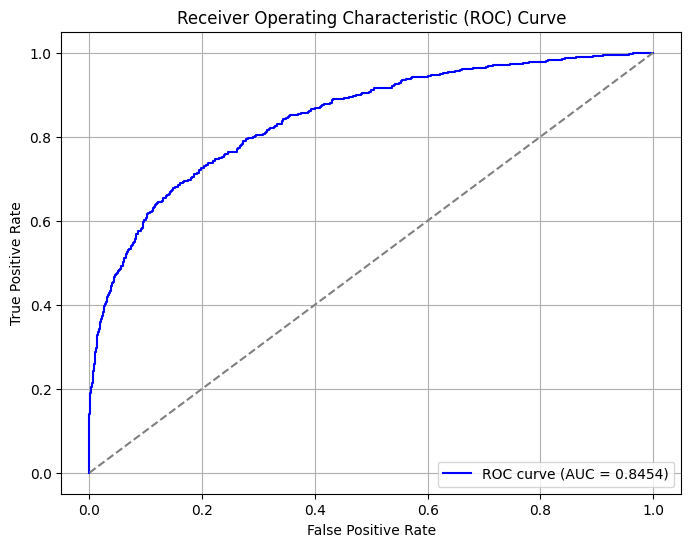

In [4]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# X, y Î∂ÑÎ¶¨
y = df['churn']  # Î™©Ìëú Î≥ÄÏàò
X = df.drop(columns=['churn'])  # ÌäπÏßï Î≥ÄÏàò

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# XGBoost Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False, 
    random_state=42
)
model.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # AUC Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú ÌôïÎ•†Í∞í

# ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)  # AUC Í≥ÑÏÇ∞
report = classification_report(y_test, y_pred, digits=4)

# Í≤∞Í≥º Ï∂úÎ†•
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')  # AUC Ï†êÏàò Ï∂úÎ†•
print('Classification Report:\n', report)

# AUC Í∑∏ÎûòÌîÑ (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ÎåÄÍ∞ÅÏÑ† Í∏∞Ï§ÄÏÑ†
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Classification Report Î∂ÑÏÑù

1. Precision (Ï†ïÎ∞ÄÎèÑ)
- ÌÅ¥ÎûòÏä§ 0 (Ï†ïÏÉÅ Í≥†Í∞ù): 87.8% ‚Üí ÏòàÏ∏°Ìïú Ï†ïÏÉÅ Í≥†Í∞ù Ï§ë Ïã§Ï†úÎ°úÎèÑ Ï†ïÏÉÅ Í≥†Í∞ùÏùº ÌôïÎ•†
- ÌÅ¥ÎûòÏä§ 1 (Ïù¥ÌÉà Í≥†Í∞ù): 68.9% ‚Üí ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù Ï§ë Ïã§Ï†úÎ°úÎèÑ Ïù¥ÌÉà Í≥†Í∞ùÏùº ÌôïÎ•†
2. Recall (Ïû¨ÌòÑÏú®)
- ÌÅ¥ÎûòÏä§ 0 (Ï†ïÏÉÅ Í≥†Í∞ù): 94.4% ‚Üí Ïã§Ï†ú Ï†ïÏÉÅ Í≥†Í∞ùÏùÑ ÏñºÎßàÎÇò Ïûò ÎßûÏ∑ÑÎäîÏßÄ
- ÌÅ¥ÎûòÏä§ 1 (Ïù¥ÌÉà Í≥†Í∞ù): 48.8% ‚Üí Ïã§Ï†ú Ïù¥ÌÉà Í≥†Í∞ùÏùÑ ÏñºÎßàÎÇò Ïûò ÎßûÏ∑ÑÎäîÏßÄ (ÎÇÆÏùå)
3. F1-score
- ÌÅ¥ÎûòÏä§ 0: 90.98% (Ï°∞Ìôî ÌèâÍ∑†)
- ÌÅ¥ÎûòÏä§ 1: 57.14% (Ï°∞Ìôî ÌèâÍ∑†, Í∞úÏÑ† ÌïÑÏöî)

### XGBOOST(GRIDSEARCHCVÏÇ¨Ïö©)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Playdata\AppData\Local\anaconda3\envs\psystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:51:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


c:\Users\Playdata\AppData\Local\anaconda3\envs\psystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:51:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8447
AUC Score: 0.8748
Classification Report:
               precision    recall  f1-score   support

           0     0.8392    0.9958    0.9108      2389
           1     0.9394    0.2537    0.3995       611

    accuracy                         0.8447      3000
   macro avg     0.8893    0.6247    0.6551      3000
weighted avg     0.8596    0.8447    0.8067      3000



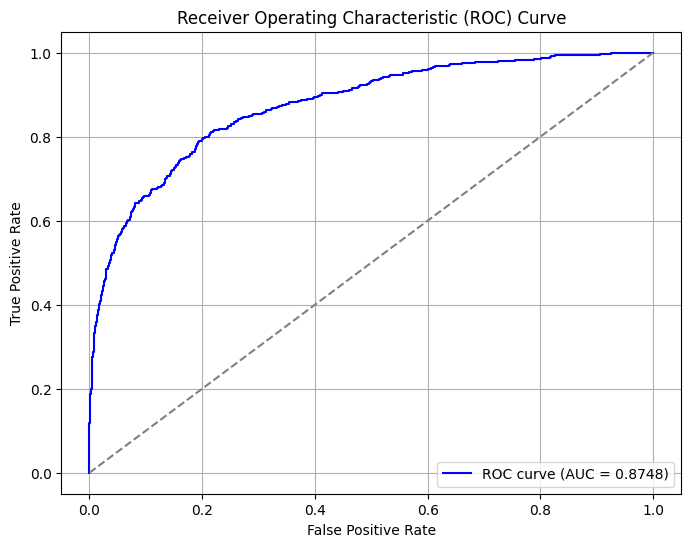

In [5]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
y = df['churn']
X = df.drop(columns=['churn'])

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # ÌïôÏäµÎ•†
    'max_depth': [3, 5, 7],  # Ìä∏Î¶¨ ÍπäÏù¥
    'n_estimators': [100, 200, 300],  # Î∂ÄÏä§ÌåÖ ÎùºÏö¥Îìú Ïàò
    'subsample': [0.7, 0.8, 0.9],  # ÏÉòÌîåÎßÅ ÎπÑÏú®
    'colsample_bytree': [0.7, 0.8, 0.9]  # ÌäπÏÑ± ÏÉòÌîåÎßÅ ÎπÑÏú®
}

# GridSearchCV Ïã§Ìñâ (5-Fold ÍµêÏ∞®Í≤ÄÏ¶ù)
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # AUC Ï†êÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏµúÏ†ÅÌôî
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1
)

# GridSearchCV Ïã§Ìñâ
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# ÏµúÏ†Å Î™®Îç∏ ÌïôÏäµ
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # AUC Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú ÌôïÎ•†Í∞í

# ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)  # AUC Ï†êÏàò Í≥ÑÏÇ∞
report = classification_report(y_test, y_pred, digits=4)

# Í≤∞Í≥º Ï∂úÎ†•
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# ‚úÖ AUC Í∑∏ÎûòÌîÑ (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ÎåÄÍ∞ÅÏÑ† Í∏∞Ï§ÄÏÑ†
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



 Classification Report Î∂ÑÏÑù

1. Precision (Ï†ïÎ∞ÄÎèÑ)
- ÌÅ¥ÎûòÏä§ 0 (Ï†ïÏÉÅ Í≥†Í∞ù): 83.92% ‚Üí Ï†ïÏÉÅ Í≥†Í∞ùÏùÑ Ïûò ÏòàÏ∏°
- ÌÅ¥ÎûòÏä§ 1 (Ïù¥ÌÉà Í≥†Í∞ù): 93.94% ‚Üí ÏòàÏ∏°Ìïú Ïù¥ÌÉà Í≥†Í∞ù Ï§ë Ïã§Ï†ú Ïù¥ÌÉà Í≥†Í∞ùÏùº ÌôïÎ•†Ïù¥ ÎÜíÏùå
2. Recall (Ïû¨ÌòÑÏú®)
- ÌÅ¥ÎûòÏä§ 0 (Ï†ïÏÉÅ Í≥†Í∞ù): 99.58% ‚Üí Ï†ïÏÉÅ Í≥†Í∞ùÏùÑ Í±∞Ïùò Îã§ ÌÉêÏßÄ
- ÌÅ¥ÎûòÏä§ 1 (Ïù¥ÌÉà Í≥†Í∞ù): 25.37% ‚Üí Ïù¥ÌÉà Í≥†Í∞ù ÌÉêÏßÄÍ∞Ä Î∂ÄÏ°±Ìï®
3. F1-score
- ÌÅ¥ÎûòÏä§ 0: 91.08% (ÎÜíÏùå)
- ÌÅ¥ÎûòÏä§ 1: 39.95% (ÎÇÆÏùå)

Best Threshold for F1-Score: 0.3242
Adjusted Accuracy: 0.8533
AUC Score: 0.8782
Classification Report:
               precision    recall  f1-score   support

           0     0.9117    0.9033    0.9075      2389
           1     0.6351    0.6579    0.6463       611

    accuracy                         0.8533      3000
   macro avg     0.7734    0.7806    0.7769      3000
weighted avg     0.8554    0.8533    0.8543      3000



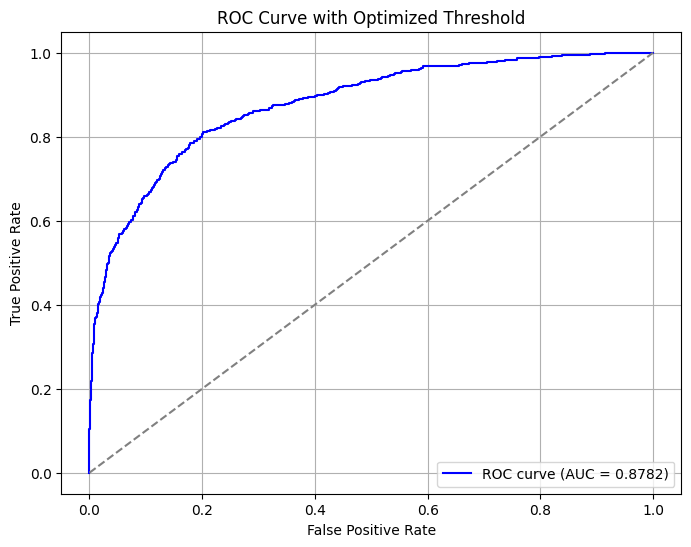

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# ÌôïÎ•† ÏòàÏ∏°Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ‚úÖ ÏµúÏ†Å ÏûÑÍ≥óÍ∞í Ï∞æÍ∏∞ (Precision-Recall tradeoff)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# ‚úÖ Í∞ÄÏû• Í∑†ÌòïÏû°Ìûå F1-ScoreÎ•º ÏúÑÌïú ÏûÑÍ≥óÍ∞í
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold for F1-Score: {best_threshold:.4f}")

# ‚úÖ ÏÉàÎ°úÏö¥ ÏûÑÍ≥óÍ∞í Ï†ÅÏö©ÌïòÏó¨ ÏòàÏ∏°Í∞í Î≥ÄÌôò
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# ‚úÖ ÏÉàÎ°≠Í≤å Ï°∞Ï†ïÎêú ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred_adjusted)
auc_score = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred_adjusted, digits=4)

print(f'Adjusted Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# ‚úÖ AUC ROC Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # ÎûúÎç§ ÏòàÏ∏°ÏÑ†
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimized Threshold')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\Playdata\AppData\Local\anaconda3\envs\psystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:01:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Playdata\AppData\Local\anaconda3\envs\psystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:01:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


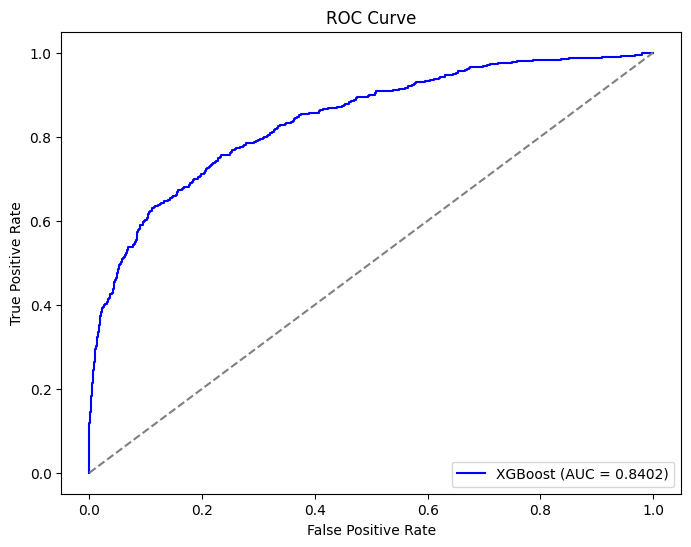

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8080
AUC Score: 0.8402
Classification Report:
               precision    recall  f1-score   support

           0     0.9093    0.8430    0.8749      2389
           1     0.5223    0.6710    0.5874       611

    accuracy                         0.8080      3000
   macro avg     0.7158    0.7570    0.7311      3000
weighted avg     0.8304    0.8080    0.8163      3000



In [14]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
y = df['churn']
X = df.drop(columns=['churn'])

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE Ï†ÅÏö© (Ïù¥ÌÉà Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ìï¥ÏÜå)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏúÑÌïú GridSearchCV ÏÑ§Ï†ï
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

# XGBoost Î™®Îç∏ ÏÉùÏÑ±
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# GridSearchCV Ïã§Ìñâ (5-Fold ÍµêÏ∞®Í≤ÄÏ¶ù)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_smote, y_train_smote)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©
best_params = grid_search.best_params_
best_xgb_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
best_xgb_model.fit(X_train_smote, y_train_smote)

# ÏòàÏ∏° ÌôïÎ•†
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.5).astype(int)  # Í∏∞Î≥∏ Threshold = 0.5

# ÏÑ±Îä• ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_probs)
report = classification_report(y_test, y_pred, digits=4)

# ROC Curve Í∑∏Î¶¨Í∏∞
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î∞è ÌèâÍ∞Ä Í≤∞Í≥º Ï∂úÎ†•
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)


c:\Users\Playdata\AppData\Local\anaconda3\envs\psystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:02:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


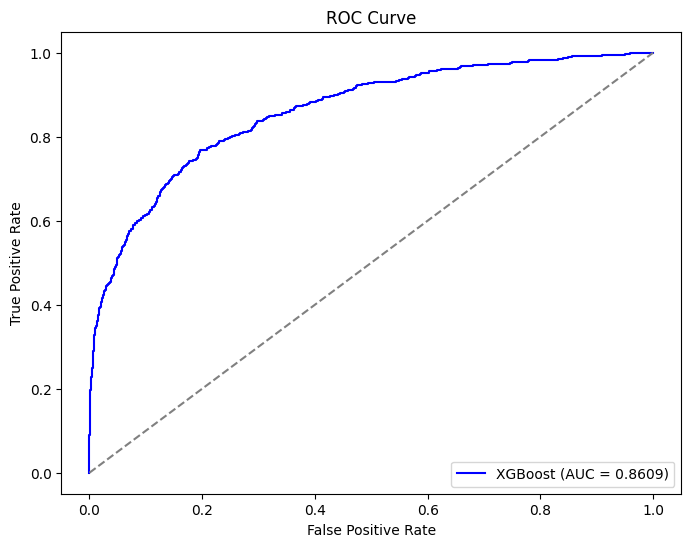

<Figure size 1000x600 with 0 Axes>

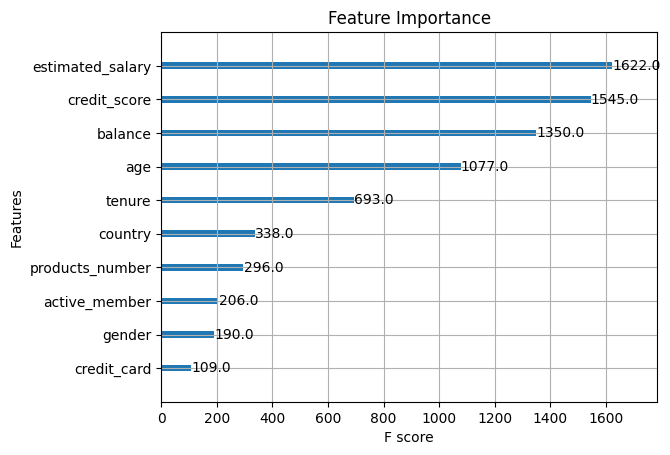

Best Threshold: 0.3757
Adjusted Accuracy: 0.8540
AUC Score: 0.8609
Classification Report:
               precision    recall  f1-score   support

           0     0.8974    0.9221    0.9096      2389
           1     0.6587    0.5876    0.6211       611

    accuracy                         0.8540      3000
   macro avg     0.7780    0.7549    0.7653      3000
weighted avg     0.8487    0.8540    0.8508      3000



In [15]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
y = df['churn']
X = df.drop(columns=['churn'])

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# GridSearchÏóêÏÑú Ï∞æÏùÄ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'n_estimators': 200,
    'subsample': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'random_state': 42
}

# XGBoost Î™®Îç∏ ÌïôÏäµ
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

# ÏòàÏ∏° ÌôïÎ•†
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# AUC Score Í≥ÑÏÇ∞
auc_score = roc_auc_score(y_test, y_probs)

# ÏµúÏ†Å Threshold Ï∞æÍ∏∞
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # F1 Í≥ÑÏÇ∞ (0 division Î∞©ÏßÄ)
best_threshold = thresholds[np.argmax(f1_scores)]  # F1Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Threshold ÏÑ†ÌÉù
y_pred_optimal = (y_probs > best_threshold).astype(int)  # ÏµúÏ†Å Threshold Ï†ÅÏö©

# ÏµúÏ†Å Threshold Ï†ÅÏö© ÌõÑ ÌèâÍ∞Ä
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
report_optimal = classification_report(y_test, y_pred_optimal, digits=4)

# ROC Curve ÏãúÍ∞ÅÌôî
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_xgb_model, max_num_features=10)  # ÏÉÅÏúÑ 10Í∞ú Î≥ÄÏàò ÌëúÏãú
plt.title("Feature Importance")
plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print(f'Best Threshold: {best_threshold:.4f}')
print(f'Adjusted Accuracy: {accuracy_optimal:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report_optimal)


### XGBOOST(OPTUNAÏÇ¨Ïö©)

‚úÖ Adjusted Accuracy: 0.8587
üî• Adjusted AUC Score: 0.8785
üìä Adjusted Classification Report:
              precision    recall  f1-score   support

           0     0.9058    0.9180    0.9119      2389
           1     0.6615    0.6268    0.6437       611

    accuracy                         0.8587      3000
   macro avg     0.7837    0.7724    0.7778      3000
weighted avg     0.8561    0.8587    0.8572      3000



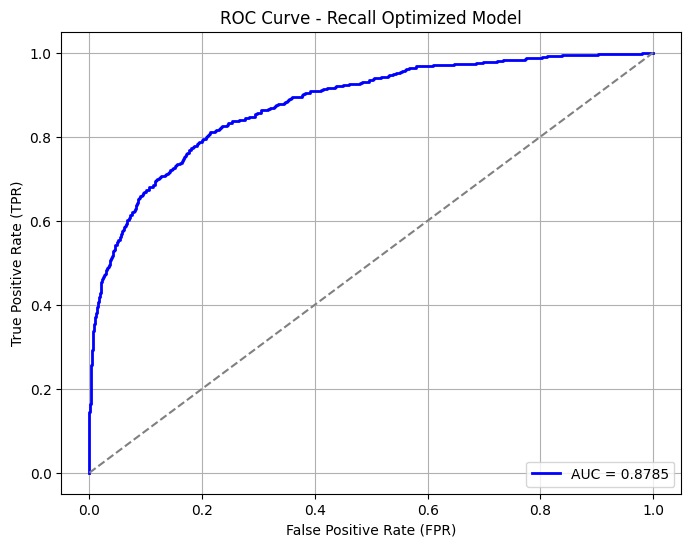

In [20]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
y = df['churn']
X = df.drop(columns=['churn'])

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ÏµúÏ†Å Recall ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
best_params = {
    'colsample_bytree': 0.998835926756326,
    'learning_rate': 0.05918736154295684,
    'max_depth': 4,
    'min_child_weight': 4,
    'n_estimators': 152,
    'subsample': 0.7171956369176462,
    'scale_pos_weight': 1.9,  # Recall ÏµúÏ†ÅÌôîÎêú ÎπÑÏú®
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42
}

# Î™®Îç∏ ÌïôÏäµ
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# ÏòàÏ∏° ÌôïÎ•†Í∞í (Positive ClassÏùò ÌôïÎ•†)
y_probs = model.predict_proba(X_test)[:, 1]

# ÏµúÏ†Å Threshold ÏÑ§Ï†ï (Recall Ï§ëÏã¨)
best_threshold = 0.4933
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# ÏÑ±Îä• ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred_adjusted)
auc_score = roc_auc_score(y_test, y_probs)
report = classification_report(y_test, y_pred_adjusted, digits=4)

print(f"‚úÖ Adjusted Accuracy: {accuracy:.4f}")
print(f"üî• Adjusted AUC Score: {auc_score:.4f}")
print(f"üìä Adjusted Classification Report:\n{report}")

# ‚úÖ AUC ROC Í∑∏ÎûòÌîÑ Ï∂úÎ†•
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Recall Optimized Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


---

# LGB ÏÇ¨Ïö©

Training until validation scores don't improve for 10 rounds
[10]	valid's binary_logloss: 0.363612
[20]	valid's binary_logloss: 0.337697
[30]	valid's binary_logloss: 0.32777
[40]	valid's binary_logloss: 0.324757
[50]	valid's binary_logloss: 0.323227
[60]	valid's binary_logloss: 0.322389
[70]	valid's binary_logloss: 0.322251
Early stopping, best iteration is:
[67]	valid's binary_logloss: 0.321905
Accuracy: 0.8670
AUC Score: 0.8766
Classification Report:
               precision    recall  f1-score   support

           0     0.8806    0.9636    0.9202      2389
           1     0.7746    0.4894    0.5998       611

    accuracy                         0.8670      3000
   macro avg     0.8276    0.7265    0.7600      3000
weighted avg     0.8590    0.8670    0.8550      3000



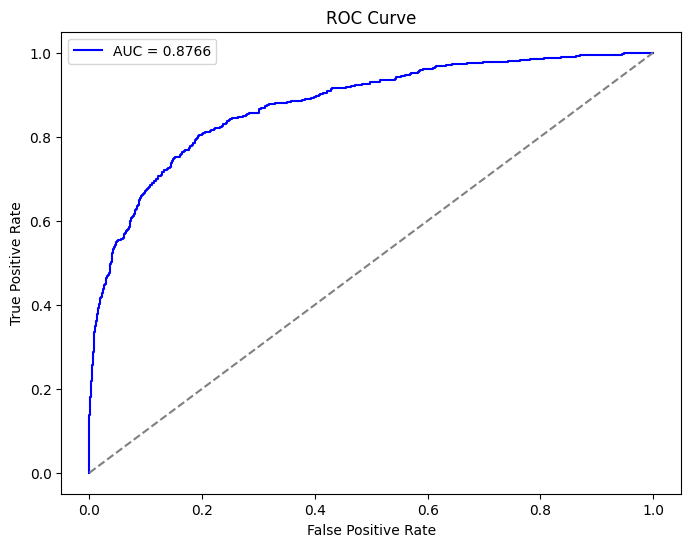

In [7]:
import pandas as pd
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# X, y Î∂ÑÎ¶¨
y = df['churn']  # Î™©Ìëú Î≥ÄÏàò
X = df.drop(columns=['churn'])  # ÌäπÏßï Î≥ÄÏàò

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# LightGBM Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)  # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÑ§Ï†ï

# LightGBM Î™®Îç∏ ÌïôÏäµ
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1
}

# callbacksÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ early stopping Ï†ÅÏö©
model = lgb.train(params, train_data, num_boost_round=100,
                  valid_sets=[valid_data], valid_names=['valid'],
                  callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)])

# ÏòàÏ∏° ÌôïÎ•†Í∞í
y_pred_proba = model.predict(X_test)

# AUC Ï†êÏàò Í≥ÑÏÇ∞
auc_score = roc_auc_score(y_test, y_pred_proba)

# ÏµúÏ†Å ÏûÑÍ≥ÑÍ∞í Ï†ÅÏö© (Í∏∞Î≥∏Í∞í 0.5)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba]

# ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# AUC-ROC Curve ÏãúÍ∞ÅÌôî
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### LGB(gridsearchÏÇ¨Ïö©)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_samples': 20, 'num_leaves': 20, 'subsample': 0.7}
Accuracy: 0.8693
AUC Score: 0.8785
Classification Report:
               precision    recall  f1-score   support

           0     0.8775    0.9715    0.9221      2389
           1     0.8085    0.4697    0.5942       611

    accuracy                         0.8693      3000
   macro avg     0.8430    0.7206    0.7582      3000
weighted avg     0.8634    0.8693    0.8553      3000



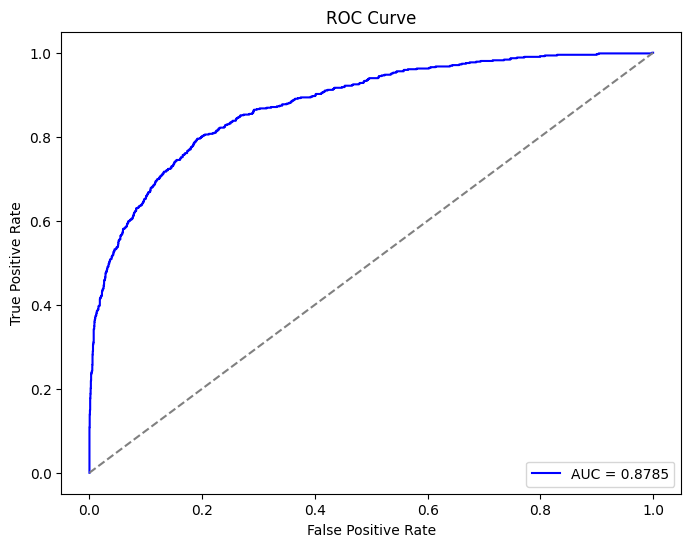

In [8]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# X, y Î∂ÑÎ¶¨
y = df['churn']  # Î™©Ìëú Î≥ÄÏàò
X = df.drop(columns=['churn'])  # ÌäπÏßï Î≥ÄÏàò

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# LightGBM Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ±
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', verbosity=-1)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≤ÄÏÉâ Í≥µÍ∞Ñ Ï†ïÏùò
param_grid = {
    'num_leaves': [20, 31, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Grid Search ÏàòÌñâ
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Best parameters found:", grid_search.best_params_)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©ÌïòÏó¨ Î™®Îç∏ Ïû¨ÌïôÏäµ
best_model = grid_search.best_estimator_

# ÏòàÏ∏°
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # AUCÎ•º ÏúÑÌï¥ ÌôïÎ•† ÏòàÏ∏°Í∞í ÏÇ¨Ïö©

# ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred, digits=4)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# AUC ROC Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### recallÍ∞í Ìñ•ÏÉÅÏúÑÌï¥ Threshold ÌäúÎãù Î∞è Class Weight Ï°∞Ï†ï

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Optimal Threshold: 0.4750
Accuracy: 0.7980
AUC Score: 0.8767
Classification Report:
               precision    recall  f1-score   support

           0     0.9407    0.7966    0.8626      2389
           1     0.5026    0.8036    0.6184       611

    accuracy                         0.7980      3000
   macro avg     0.7216    0.8001    0.7405      3000
weighted avg     0.8515    0.7980    0.8129      3000



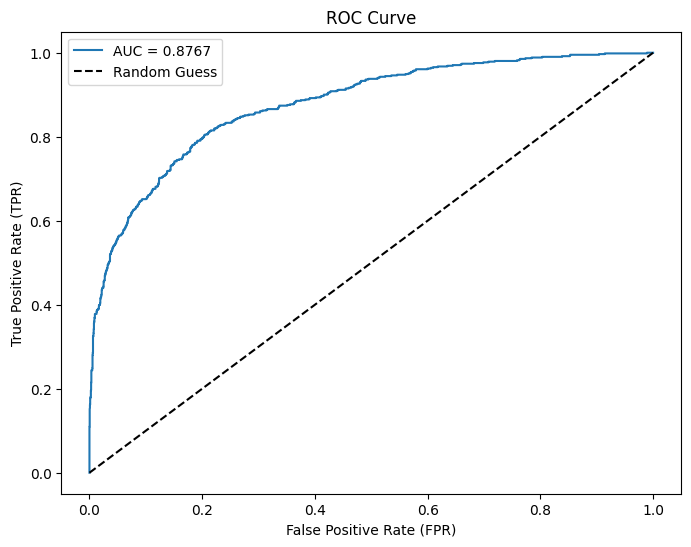

In [9]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
y = df['churn']
X = df.drop(columns=['churn'])

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ‚úÖ LightGBM Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ± (Class Weight Ï†ÅÏö©)
model = lgb.LGBMClassifier(
    objective='binary', 
    metric='binary_logloss', 
    class_weight='balanced',  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î≥¥Ï†ï
    verbosity=-1
)

# ‚úÖ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≤ÄÏÉâ Í≥µÍ∞Ñ Ï†ïÏùò
param_grid = {
    'num_leaves': [20, 31, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# ‚úÖ Grid Search ÏàòÌñâ
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',  # AUC Í∏∞Ï§ÄÏúºÎ°ú ÏµúÏ†ÅÌôî
    cv=3,  
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# ‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©ÌïòÏó¨ Î™®Îç∏ Ïû¨ÌïôÏäµ
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # ÌôïÎ•†Í∞í ÏòàÏ∏°

# ‚úÖ ÏµúÏ†Å Threshold Ï∞æÍ∏∞ (Precision-Recall Í∑†Ìòï)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# ‚úÖ ÏÉàÎ°úÏö¥ ThresholdÎ°ú ÏòàÏ∏° Î≥ÄÌôò
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# ‚úÖ ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred, digits=4)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# ‚úÖ AUC ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_samples': 50, 'num_leaves': 20, 'subsample': 0.7}
Optimal Threshold: 0.1934
Accuracy: 0.8007
AUC Score: 0.8782
Classification Report:
               precision    recall  f1-score   support

           0     0.9427    0.7982    0.8645      2389
           1     0.5067    0.8101    0.6234       611

    accuracy                         0.8007      3000
   macro avg     0.7247    0.8042    0.7439      3000
weighted avg     0.8539    0.8007    0.8154      3000



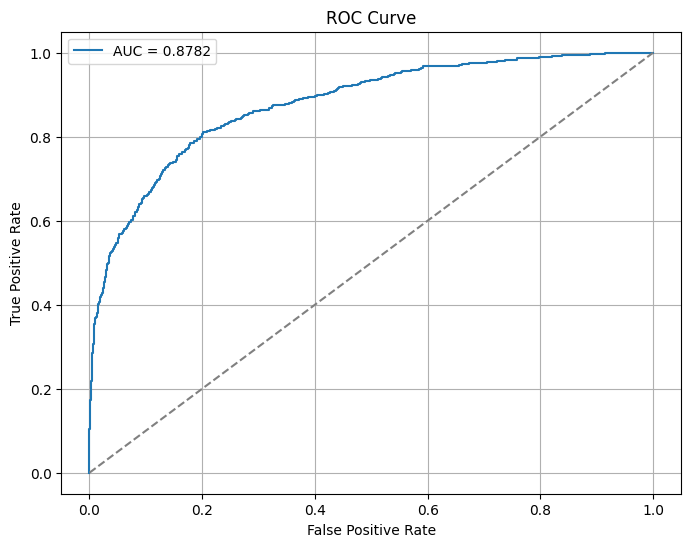

In [10]:
import pandas as pd
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# X, y Î∂ÑÎ¶¨
y = df['churn']  # Î™©Ìëú Î≥ÄÏàò
X = df.drop(columns=['churn'])  # ÌäπÏßï Î≥ÄÏàò

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# LightGBM Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ±
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', verbosity=-1)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≤ÄÏÉâ Í≥µÍ∞Ñ Ï†ïÏùò
param_grid = {
    'num_leaves': [20, 31, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Grid Search ÏàòÌñâ
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',  # AUC Ï†êÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏµúÏ†ÅÌôî
    cv=3,  # 3-Ìè¥Îìú ÍµêÏ∞®Í≤ÄÏ¶ù
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©ÌïòÏó¨ Î™®Îç∏ Ïû¨ÌïôÏäµ
best_model = grid_search.best_estimator_

# ÏòàÏ∏° (ÌôïÎ•† Í∞í)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# üîç ÏµúÏ†ÅÏùò Threshold Ï∞æÍ∏∞
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# ÏµúÏ†Å Threshold Í∏∞Î∞òÏúºÎ°ú Ïù¥ÏßÑ ÏòàÏ∏°
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred, digits=4)

# Í≤∞Í≥º Ï∂úÎ†•
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Optimal Threshold: {optimal_threshold:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# AUC Í≥°ÏÑ† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # ÎåÄÍ∞ÅÏÑ† Í∏∞Ï§ÄÏÑ†
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
